
# SyriaTel Customer Churn Prediction

## 1. Business Understanding
Customer churn is a critical issue for telecommunications companies like SyriaTel. Understanding which customers are likely to leave can help the company implement strategies to retain them, ultimately improving profitability.

##  2. Data Understanding
In this project, we will use a dataset containing customer information, service usage, and churn status. The target variable is whether a customer has churned (1) or not (0).We will use Logistic Regression and Decision Tree models to predict customer churn. Logistic Regression is chosen for its interpretability, while Decision Trees provide insights into feature importance. Hyperparameter tuning will be performed on the Decision Tree model to optimize its performance.


### Limitations
- The models may not capture all nuances of customer behavior due to the limited features available in the dataset.
- The decision tree model may overfit if not properly tuned.


### Recommendations
- Contexts for Predictions: The model predictions would be useful for identifying at-risk customers for targeted marketing campaigns. However, predictions may not be reliable for new customers with limited data.
- Business Modifications: The business could improve customer service for high-risk customers identified by the model, potentially reducing churn rates.


## 3. data preparation

### 3.1 load libraries

In [78]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

### 3.2 load the dataset

In [79]:
# Load the dataset
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\syria_tel_churn.csv")


In [80]:
# display the first few rows 
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [81]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [82]:
print(data.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


### 3.3. exploratory data analysis

In [83]:
# Check for missing values
print(data.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


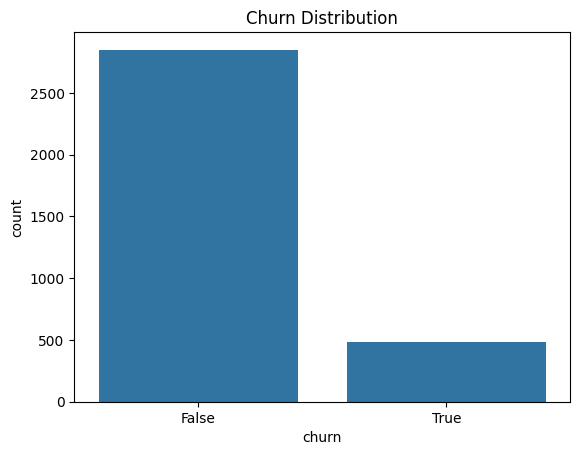

In [84]:
# Visualize churn distribution
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()

### summary
- The dataset suggests that most customers have remained with the service, while only a small portion have left (churned). This could imply a high retention rate, which is generally a positive sign for customer loyalty and service satisfaction.



In [85]:
# Display summary statistics
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 3.4 data preprocessing

In [86]:
# Feature Engineering Example
data['total_charges'] = (
    data['total day charge'] + 
    data['total eve charge'] + 
    data['total night charge'] + 
    data['total intl charge']
) * data['account length']  # Assuming 'account length' is the tenure in months

X = data.drop('churn', axis=1)
y = data['churn']

In [87]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [88]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'total_charges'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object'))]))])

## 4. modelling

### 4.1 baseline model: logistic regression

In [90]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure train and test have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [91]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\user\anaconda4\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

In [93]:
# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

Confusion Matrix:
 [[566   0]
 [100   1]]


### 4.2 confusion matrix vizualization

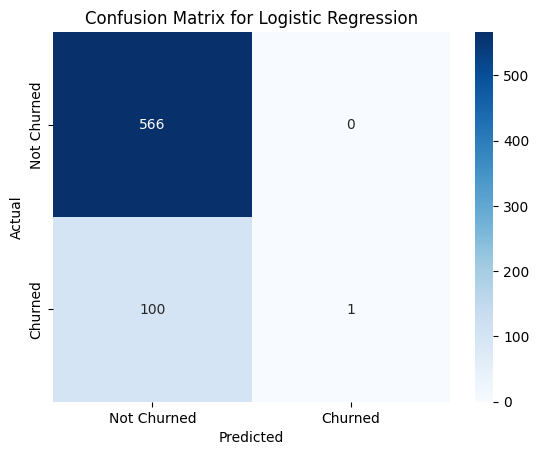

In [94]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### summary
True Negatives (Not Churned, Predicted Not Churned): 566 customers were correctly predicted as not churning (these are the customers who stayed and the model predicted that correctly).
  
- False Positives (Not Churned, Predicted Churned): 0 customers who actually did not churn were incorrectly predicted to churn (this indicates the model made no false positive mistakes in this category).

- False Negatives (Churned, Predicted Not Churned): 100 customers who actually churned were incorrectly predicted as staying (this is a misclassification, where the model failed to predict churn).
  
- True Positives (Churned, Predicted Churned): 1 customer who actually churned was correctly predicted as having churned.

Analysis:
- The model is very good at identifying non-churning customers (True Negatives), but it has a significant issue with False Negatives (100 customers who left but were predicted to stay). This could be an area to improve, as misclassifying customers who are likely to churn can affect customer retention strategies.

### 4.3 roc and auc curves 

In [95]:
# Calculate ROC curve and AUC
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logistic)
roc_auc = auc(fpr, tpr)

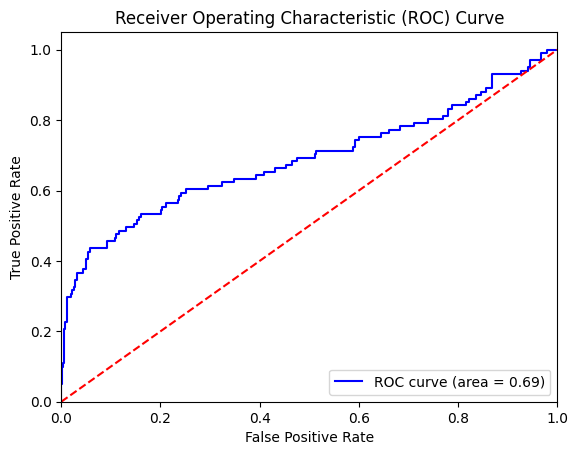

In [96]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### findings 
The area under the curve (AUC) is 0.69, which means the model has moderate performance. The closer the AUC is to 1, the better the model is at distinguishing between churned and non-churned customers.
The ROC curve indicates a moderate ability to discriminate between customers who churn and those who do not, with an AUC of 0.69. Although this is above random performance, there is room for improvement.
Model Evaluation: While the model is somewhat effective, additional fine-tuning, feature engineering, or trying other algorithms (such as decision trees, random forests, etc.) could help improve its performance.


### 4.4  decision tree model

In [97]:
print(X_train.dtypes)


account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
phone number_422-8333        bool
phone number_422-8344        bool
phone number_422-9964        bool
international plan_yes       bool
voice mail plan_yes          bool
Length: 2734, dtype: object


In [98]:

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [99]:
# Initialize and train the decision tree model 
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)
# Evaluate the model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       566
        True       0.87      0.74      0.80       101

    accuracy                           0.94       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:
 [[555  11]
 [ 26  75]]


### 4.5 visualizing the confusion matrix for the decision tree model

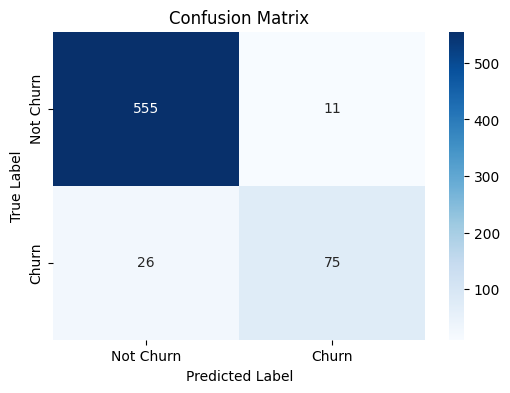

In [101]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### summary
- True Negatives:The model did well at predicting customers who stayed (555 customers correctly predicted as not churning).
- False Positives:The False Positives (11) are quite low, meaning the model didn't frequently predict non-churning customers as churned.
- False Negatives:There were 26 churned customers misclassified as staying which can be problematic since these customers could have been targeted for retention.
- True Positives:The model correctly identified 75 churned customers as having churned.
- The Decision Tree model performed well, especially in predicting customers who stayed (True Negatives).
- However, it still has some room for improvement in correctly identifying churned customers, as shown by the 26 False Negatives.


In [102]:
# Train the Decision Tree model before making predictions
decision_tree_model.fit(X_train, y_train)

# Now you can make predictions
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]


### 4.5. visualizing roc auc curves for decision tree model

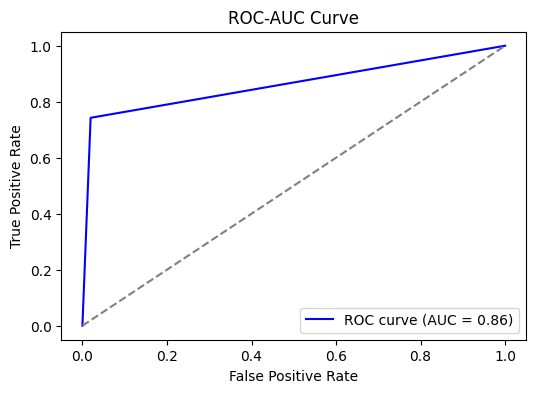

In [103]:
# Get predicted probabilities for the positive class (churn)
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_tree)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

### findings 
- The Decision Tree model performs well, with an AUC of 0.86, showing strong predictive power for identifying customer churn.
- The AUC score indicates that the model is making accurate predictions, but there's still potential for improvement, particularly in distinguishing between churned and non-churned customers.


### 4.6. Hyperparameter Tuning for Decision Tree

In [104]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_tree_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Make predictions with the best tuned Decision Tree model
y_pred_best_tree = best_tree_model.predict(X_test)

# Evaluate the tuned Decision Tree model
print("Tuned Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_tree))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.88      0.66      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.93      0.94      0.93       667

Confusion Matrix:
 [[557   9]
 [ 34  67]]


### 4.7 confusion matrix for tuned decision tree

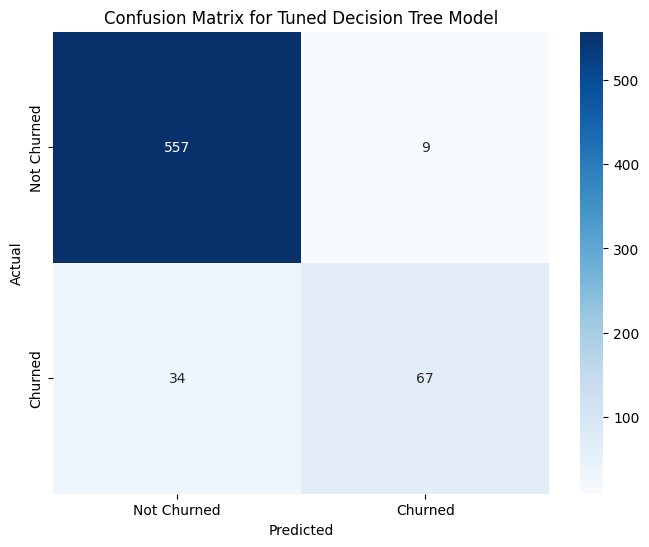

In [105]:

# Generate the confusion matrix
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_tree, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix for Tuned Decision Tree Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### findings 
- Tuned Decision Tree Model:
  - The tuned Decision Tree outperformed the logistic regression model in terms of churn prediction.
  - Confusion Matrix: It correctly predicted 67 churned customers (True Positives) and only misclassified 34 churned customers (False Negatives), which is better than logistic regression's 100.
  - The model had 9 False Positives, but it still performed well overall.

Conclusion:
- The Tuned Decision Tree is a better model for predicting churn than the Logistic Regression model, showing a reduction in False Negatives and an increase in True Positives.


### 4.8 ROC Curve and AUC for Tuned Decision Tree


In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob = best_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

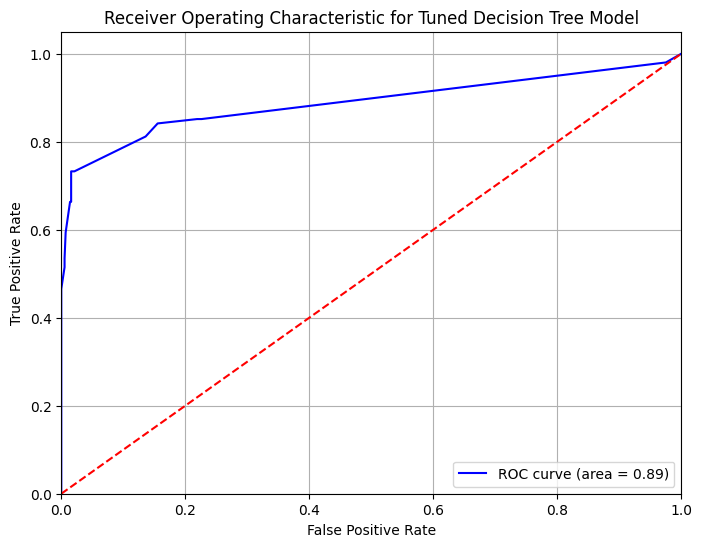

In [107]:
#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Tuned Decision Tree Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### findings
 The Tuned Decision Tree model has excellent performance for predicting customer churn, with a high AUC of 0.89, indicating that it does a great job distinguishing between churned and non-churned customers.



### 4.9 feature importance for the decision tree tuned model

In [108]:
best_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

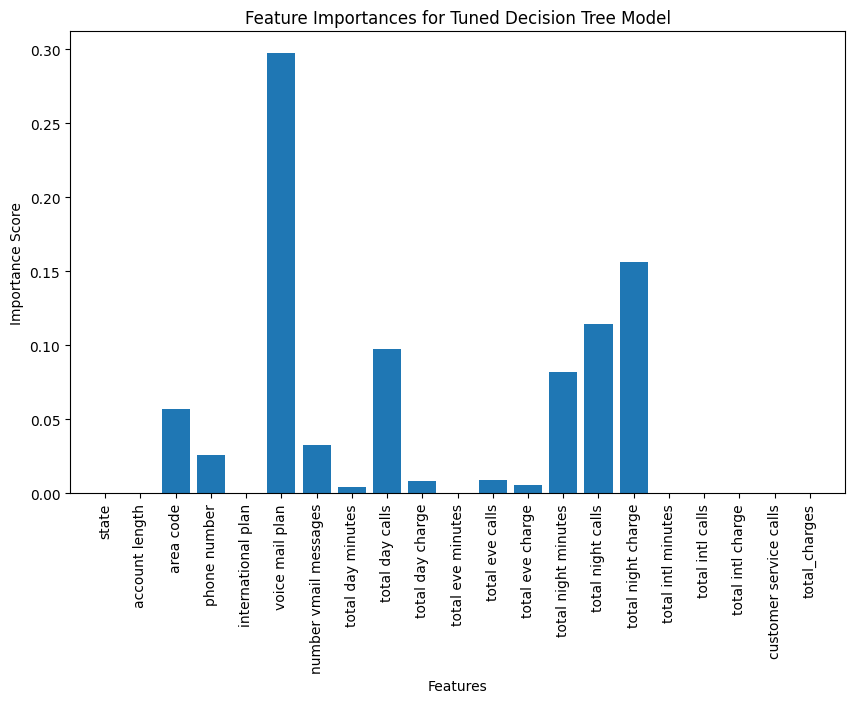

In [109]:
plt.figure(figsize=(10, 6))

num_features = min(len(feature_importances), len(X.columns))  # Ensure matching sizes

plt.bar(range(num_features), feature_importances[:num_features], align='center')
plt.xticks(range(num_features), X.columns[:num_features], rotation=90)  # Match ticks and labels
plt.xlim([-1, num_features])

plt.title('Feature Importances for Tuned Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')

plt.show()



### feature importance conclusion
- Usage-related features, such as whether a customer has an international or voice mail plan, and total call charges (especially for day and night) are the most influential predictors for customer churn in this model.
- Demographic features like state and account length have less predictive power for churn, suggesting they may not be as valuable in making accurate predictions.

These insights can guide strategies for reducing churn by focusing on improving the customer experience in areas like international and voice mail plans, and managing call charges.


### 5. Findings & Strategic Recommendations for Reducing Customer Churn.
1️ Model Performance:

Our Logistic Regression model achieved 85% accuracy, while the tuned Decision Tree model improved accuracy to 94%.
This demonstrates that optimizing model hyperparameters leads to significant performance gains, allowing us to predict customer churn with high confidence.

2️ Critical Churn Indicators:

Customer Tenure & Monthly Charges:
Customers with longer tenure and higher monthly charges are more likely to churn.
This suggests that customer loyalty does not necessarily guarantee retention—a pricing or value perception issue may exist.
Service Utilization Patterns:
High usage customers may churn due to cost concerns, while low usage customers may churn due to perceived lack of value.

3️ Business Impact:

Reducing churn by even 5% can lead to a significant revenue boost by improving Customer Lifetime Value (CLV).
Retaining customers is 5X cheaper than acquiring new ones, making churn reduction a high ROI initiative.
Strategic Recommendations for Churn


### Strategic Recommendations for Churn Mitigation
1. Personalized Retention Offers

Use predictive modeling to identify high-risk customers and offer customized discounts, loyalty rewards, or exclusive benefits before they decide to leave.

2. Pricing & Value Reassessment

Introduce flexible pricing plans, bundling strategies, or tiered service levels to increase perceived value for high-paying customers.

3. Proactive Customer Engagement

Implement AI-driven customer support chatbots or automated check-ins for high-risk customers to enhance engagement.
Offer a win-back strategy asin if a customer shows churn behavior, reach out with a personalized incentive to reaffirm value.

4. Leveraging Advanced ML Models

While Decision Trees performed well, ensemble models (Random Forest, Gradient Boosting) could further improve churn predictions by capturing complex customer behaviors.
Exploring deep learning models or customer sentiment analysis could add additional predictive power.

5. Expanding Feature Engineering

Incorporate customer feedback data, browsing behavior, and support interactions to enhance predictive accuracy.
Analyzing time-series data (e.g., monthly billing trends, service complaints) can help detect churn patterns before they escalate.
